In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 27.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 11.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

Cloning into 'mmocr'...
remote: Enumerating objects: 16277, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 16277 (delta 56), reused 138 (delta 42), pack-reused 16089
Receiving objects: 100% (16277/16277), 16.24 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (10654/10654), done.
/content/mmocr
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmocr
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-iy4v1wvn/mmocr.egg-info
  writing /tmp/pip-pip-egg-info-iy4v1wvn/mmocr.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-iy4v1wvn/mmocr.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-iy4v1wvn/mmocr.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-iy4v1

In [ ]:
from mmocr.datasets import OCRDataset
from mmengine.registry import init_default_scope
from mmocr.apis import MMOCRInferencer
from mmengine.runner import Runner
import time
import mmcv
import matplotlib.pyplot as plt
from mmengine.runner import Runner
from mmengine import Config
from mmocr.apis import MMOCRInferencer
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cfg = Config.fromfile('/content/mmocr/configs/textdet/dbnet/dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015.py')

In [ ]:
cfg.keys()

dict_keys(['model', 'train_pipeline', 'test_pipeline', 'icdar2015_textdet_data_root', 'icdar2015_textdet_train', 'icdar2015_textdet_test', 'default_scope', 'env_cfg', 'randomness', 'default_hooks', 'log_level', 'log_processor', 'load_from', 'resume', 'val_evaluator', 'test_evaluator', 'vis_backends', 'visualizer', 'optim_wrapper', 'train_cfg', 'val_cfg', 'test_cfg', 'param_scheduler', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'auto_scale_lr'])

In [ ]:
cfg.work_dir = 'work_dirs/test/'

In [ ]:
cfg.train_cfg.max_epochs = 10

In [ ]:
data_root = '/content/drive/MyDrive/Colab Notebooks/pj4_desktop/Temp/'

In [ ]:
cfg.icdar2015_textdet_data_root = data_root + 'temp_Sign'

In [ ]:
cfg.icdar2015_textdet_train.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_train.ann_file = data_root + 'temp_train_annotation.json'

In [ ]:
cfg.icdar2015_textdet_test.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_test.ann_file = data_root + 'temp_test_annotation.json'

In [ ]:
cfg.train_dataloader.num_workers = 1
cfg.train_dataloader.batch_size = 5
cfg.train_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.train_dataloader.dataset.ann_file = data_root + 'temp_train_annotation.json'

In [ ]:
cfg.test_dataloader.num_workers = 1
cfg.test_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.test_dataloader.dataset.ann_file = data_root + 'temp_test_annotation.json'

In [ ]:
cfg.val_dataloader.num_workers = 1
cfg.val_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.val_dataloader.dataset.ann_file = data_root + 'temp_valid_annotation.json'

In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)
runner.train()

05/17 10:23:23 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 467494501
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmocr.visualization.textdet_visualizer.TextDetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


05/17 10:23:26 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/17 10:23:26 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:35:41 - mmengine - INFO - Epoch(train)  [2][ 75/130]  lr: 6.9947e-03  eta: 1:04:40  time: 1.5874  data_time: 0.6164  memory: 4785  loss: 3.4937  loss_prob: 2.2230  loss_thr: 0.8661  loss_db: 0.4045
05/17 10:35:48 - mmengine - INFO - Epoch(train)  [2][ 80/130]  lr: 6.9947e-03  eta: 1:03:29  time: 1.6477  data_time: 0.6725  memory: 4785  loss: 3.6508  loss_prob: 2.3272  loss_thr: 0.8879  loss_db: 0.4357
05/17 10:35:57 - mmengine - INFO - Epoch(train)  [2][ 85/130]  lr: 6.9947e-03  eta: 1:02:28  time: 1.6256  data_time: 0.6011  memory: 4785  loss: 3.5922  loss_prob: 2.2740  loss_thr: 0.8999  loss_db: 0.4183
05/17 10:36:03 - mmengine - INFO - Epoch(train)  [2][ 90/130]  lr: 6.9947e-03  eta: 1:01:18  time: 1.5457  data_time: 0.5451  memory: 4785  loss: 3.4936  loss_prob: 2.2039  loss_thr: 0.8835  loss_db: 0.4061
05/17 10:36:13 - mmengine - INFO - Epoch(train)  [2][ 95/130]  lr: 6.9947e-03  eta: 1:00:25  time: 1.5936  data_time: 0.6117  memory: 4785  loss: 3.5479  loss_prob: 2.2393 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:40:32 - mmengine - INFO - Epoch(train)  [3][125/130]  lr: 6.9895e-03  eta: 0:40:18  time: 1.6259  data_time: 0.6215  memory: 4785  loss: 3.1411  loss_prob: 2.0113  loss_thr: 0.7776  loss_db: 0.3522
05/17 10:40:39 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230517_102323
05/17 10:40:39 - mmengine - INFO - Epoch(train)  [3][130/130]  lr: 6.9895e-03  eta: 0:39:50  time: 1.5923  data_time: 0.6123  memory: 4785  loss: 3.2896  loss_prob: 2.1097  loss_thr: 0.7940  loss_db: 0.3859
05/17 10:40:48 - mmengine - INFO - Epoch(train)  [4][  5/130]  lr: 6.9842e-03  eta: 0:39:28  time: 1.6339  data_time: 0.6686  memory: 4785  loss: 3.3915  loss_prob: 2.1727  loss_thr: 0.8210  loss_db: 0.3977
05/17 10:40:55 - mmengine - INFO - Epoch(train)  [4][ 10/130]  lr: 6.9842e-03  eta: 0:39:02  time: 1.6417  data_time: 0.6652  memory: 4785  loss: 3.2819  loss_prob: 2.0985  loss_thr: 0.7924  loss_db: 0.3910
05/17 10:41:04 - mmengine - INFO - Epoch(train)  [4][ 15/130]  lr: 6.

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:41:53 - mmengine - INFO - Epoch(train)  [4][ 45/130]  lr: 6.9842e-03  eta: 0:36:24  time: 1.6044  data_time: 0.5420  memory: 4785  loss: 3.5109  loss_prob: 2.2315  loss_thr: 0.8568  loss_db: 0.4226


/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:42:00 - mmengine - INFO - Epoch(train)  [4][ 50/130]  lr: 6.9842e-03  eta: 0:36:01  time: 1.6538  data_time: 0.5966  memory: 4785  loss: 3.1542  loss_prob: 1.9950  loss_thr: 0.8104  loss_db: 0.3488
05/17 10:42:09 - mmengine - INFO - Epoch(train)  [4][ 55/130]  lr: 6.9842e-03  eta: 0:35:41  time: 1.6275  data_time: 0.6144  memory: 4785  loss: 3.2068  loss_prob: 2.0241  loss_thr: 0.8207  loss_db: 0.3619
05/17 10:42:16 - mmengine - INFO - Epoch(train)  [4][ 60/130]  lr: 6.9842e-03  eta: 0:35:18  time: 1.5573  data_time: 0.5579  memory: 4785  loss: 3.3534  loss_prob: 2.1327  loss_thr: 0.8360  loss_db: 0.3847
05/17 10:42:25 - mmengine - INFO - Epoch(train)  [4][ 65/130]  lr: 6.9842e-03  eta: 0:34:59  time: 1.5805  data_time: 0.5911  memory: 4785  loss: 3.1704  loss_prob: 2.0088  loss_thr: 0.8062  loss_db: 0.3555
05/17 10:42:32 - mmengine - INFO - Epoch(train)  [4][ 70/130]  lr: 6.9842e-03  eta: 0:34:37  time: 1.6307  data_time: 0.6449  memory: 4785  loss: 3.3253  loss_prob: 2.0949 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:42:48 - mmengine - INFO - Epoch(train)  [4][ 80/130]  lr: 6.9842e-03  eta: 0:33:57  time: 1.6041  data_time: 0.6283  memory: 4785  loss: 3.1413  loss_prob: 1.9694  loss_thr: 0.8192  loss_db: 0.3527
05/17 10:42:57 - mmengine - INFO - Epoch(train)  [4][ 85/130]  lr: 6.9842e-03  eta: 0:33:39  time: 1.5938  data_time: 0.6098  memory: 4785  loss: 3.1490  loss_prob: 1.9986  loss_thr: 0.7901  loss_db: 0.3603
05/17 10:43:04 - mmengine - INFO - Epoch(train)  [4][ 90/130]  lr: 6.9842e-03  eta: 0:33:18  time: 1.6169  data_time: 0.6480  memory: 4785  loss: 3.2171  loss_prob: 2.0277  loss_thr: 0.8192  loss_db: 0.3701
05/17 10:43:13 - mmengine - INFO - Epoch(train)  [4][ 95/130]  lr: 6.9842e-03  eta: 0:33:01  time: 1.6400  data_time: 0.6485  memory: 4785  loss: 3.2245  loss_prob: 2.0298  loss_thr: 0.8312  loss_db: 0.3635
05/17 10:43:20 - mmengine - INFO - Epoch(train)  [4][100/130]  lr: 6.9842e-03  eta: 0:32:40  time: 1.6078  data_time: 0.6002  memory: 4785  loss: 3.1655  loss_prob: 1.9988 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:47:13 - mmengine - INFO - Epoch(train)  [5][115/130]  lr: 6.9790e-03  eta: 0:24:46  time: 1.5866  data_time: 0.5987  memory: 4785  loss: 3.6219  loss_prob: 2.3044  loss_thr: 0.8796  loss_db: 0.4379
05/17 10:47:21 - mmengine - INFO - Epoch(train)  [5][120/130]  lr: 6.9790e-03  eta: 0:24:31  time: 1.6283  data_time: 0.6246  memory: 4785  loss: 3.6399  loss_prob: 2.3079  loss_thr: 0.8798  loss_db: 0.4522
05/17 10:47:30 - mmengine - INFO - Epoch(train)  [5][125/130]  lr: 6.9790e-03  eta: 0:24:17  time: 1.6300  data_time: 0.6056  memory: 4785  loss: 3.3526  loss_prob: 2.1386  loss_thr: 0.8159  loss_db: 0.3982
05/17 10:47:36 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230517_102323
05/17 10:47:36 - mmengine - INFO - Epoch(train)  [5][130/130]  lr: 6.9790e-03  eta: 0:24:02  time: 1.5838  data_time: 0.5682  memory: 4785  loss: 3.3539  loss_prob: 2.1360  loss_thr: 0.8264  loss_db: 0.3915
05/17 10:47:47 - mmengine - INFO - Epoch(train)  [6][  5/130]  lr: 6.

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:58:07 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230517_102323
05/17 10:58:07 - mmengine - INFO - Epoch(train)  [8][130/130]  lr: 6.9632e-03  eta: 0:08:38  time: 1.6640  data_time: 0.6440  memory: 4785  loss: 3.1303  loss_prob: 1.9912  loss_thr: 0.7814  loss_db: 0.3577
05/17 10:58:17 - mmengine - INFO - Epoch(train)  [9][  5/130]  lr: 6.9580e-03  eta: 0:08:28  time: 1.7224  data_time: 0.6979  memory: 4785  loss: 3.2741  loss_prob: 2.0570  loss_thr: 0.8401  loss_db: 0.3770
05/17 10:58:23 - mmengine - INFO - Epoch(train)  [9][ 10/130]  lr: 6.9580e-03  eta: 0:08:17  time: 1.6892  data_time: 0.6730  memory: 4785  loss: 3.3690  loss_prob: 2.1498  loss_thr: 0.8207  loss_db: 0.3984
05/17 10:58:33 - mmengine - INFO - Epoch(train)  [9][ 15/130]  lr: 6.9580e-03  eta: 0:08:07  time: 1.6445  data_time: 0.6412  memory: 4785  loss: 3.2761  loss_prob: 2.1055  loss_thr: 0.7943  loss_db: 0.3763
05/17 10:58:40 - mmengine - INFO - Epoch(train)  [9][ 20/130]  lr: 6.

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 10:59:06 - mmengine - INFO - Epoch(train)  [9][ 35/130]  lr: 6.9580e-03  eta: 0:07:26  time: 1.6704  data_time: 0.6515  memory: 4785  loss: 3.1118  loss_prob: 1.9734  loss_thr: 0.7898  loss_db: 0.3486
05/17 10:59:13 - mmengine - INFO - Epoch(train)  [9][ 40/130]  lr: 6.9580e-03  eta: 0:07:15  time: 1.6135  data_time: 0.6047  memory: 4785  loss: 2.7680  loss_prob: 1.7403  loss_thr: 0.7213  loss_db: 0.3064
05/17 10:59:23 - mmengine - INFO - Epoch(train)  [9][ 45/130]  lr: 6.9580e-03  eta: 0:07:05  time: 1.6422  data_time: 0.6547  memory: 4785  loss: 2.6592  loss_prob: 1.6570  loss_thr: 0.7128  loss_db: 0.2895
05/17 10:59:30 - mmengine - INFO - Epoch(train)  [9][ 50/130]  lr: 6.9580e-03  eta: 0:06:55  time: 1.6302  data_time: 0.6599  memory: 4785  loss: 2.9129  loss_prob: 1.8304  loss_thr: 0.7600  loss_db: 0.3225
05/17 10:59:38 - mmengine - INFO - Epoch(train)  [9][ 55/130]  lr: 6.9580e-03  eta: 0:06:45  time: 1.5606  data_time: 0.5517  memory: 4785  loss: 2.9935  loss_prob: 1.8927 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/17 11:05:08 - mmengine - INFO - Epoch(train) [10][125/130]  lr: 6.9527e-03  eta: 0:00:09  time: 1.6455  data_time: 0.6262  memory: 4785  loss: 3.3420  loss_prob: 2.1420  loss_thr: 0.8093  loss_db: 0.3907
05/17 11:05:15 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230517_102323
05/17 11:05:15 - mmengine - INFO - Epoch(train) [10][130/130]  lr: 6.9527e-03  eta: 0:00:00  time: 1.5565  data_time: 0.6006  memory: 4785  loss: 3.0470  loss_prob: 1.9382  loss_thr: 0.7658  loss_db: 0.3430
05/17 11:05:15 - mmengine - INFO - Saving checkpoint at 10 epochs


DBNet(
  (data_preprocessor): TextDetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True

In [ ]:
runner.test()

05/17 11:06:50 - mmengine - INFO - Epoch(test) [  5/200]    eta: 0:02:38  time: 0.8129  data_time: 0.6288  memory: 838  
05/17 11:06:54 - mmengine - INFO - Epoch(test) [ 10/200]    eta: 0:02:30  time: 0.7945  data_time: 0.6100  memory: 913  
05/17 11:06:58 - mmengine - INFO - Epoch(test) [ 15/200]    eta: 0:02:26  time: 0.7835  data_time: 0.6037  memory: 838  
05/17 11:07:02 - mmengine - INFO - Epoch(test) [ 20/200]    eta: 0:02:24  time: 0.8079  data_time: 0.6278  memory: 838  
05/17 11:07:06 - mmengine - INFO - Epoch(test) [ 25/200]    eta: 0:02:18  time: 0.7931  data_time: 0.6093  memory: 913  
05/17 11:07:10 - mmengine - INFO - Epoch(test) [ 30/200]    eta: 0:02:14  time: 0.7788  data_time: 0.5930  memory: 838  
05/17 11:07:13 - mmengine - INFO - Epoch(test) [ 35/200]    eta: 0:02:09  time: 0.7630  data_time: 0.5643  memory: 1097  
05/17 11:07:17 - mmengine - INFO - Epoch(test) [ 40/200]    eta: 0:02:04  time: 0.7310  data_time: 0.5443  memory: 838  
05/17 11:07:21 - mmengine - INF

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/17 11:07:40 - mmengine - INFO - Epoch(test) [ 70/200]    eta: 0:01:40  time: 0.7294  data_time: 0.5519  memory: 838  
05/17 11:07:43 - mmengine - INFO - Epoch(test) [ 75/200]    eta: 0:01:36  time: 0.7479  data_time: 0.5730  memory: 860  
05/17 11:07:47 - mmengine - INFO - Epoch(test) [ 80/200]    eta: 0:01:32  time: 0.7447  data_time: 0.5726  memory: 936  
05/17 11:07:51 - mmengine - INFO - Epoch(test) [ 85/200]    eta: 0:01:28  time: 0.7573  data_time: 0.5640  memory: 913  
05/17 11:07:55 - mmengine - INFO - Epoch(test) [ 90/200]    eta: 0:01:24  time: 0.7663  data_time: 0.5770  memory: 838  
05/17 11:07:59 - mmengine - INFO - Epoch(test) [ 95/200]    eta: 0:01:20  time: 0.7613  data_time: 0.5838  memory: 806  
05/17 11:08:02 - mmengine - INFO - Epoch(test) [100/200]    eta: 0:01:16  time: 0.7572  data_time: 0.5805  memory: 838  
05/17 11:08:06 - mmengine - INFO - Epoch(test) [105/200]    eta: 0:01:12  time: 0.7539  data_time: 0.5463  memory: 1388  
05/17 11:08:10 - mmengine - INF

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3

05/17 11:08:14 - mmengine - INFO - Epoch(test) [115/200]    eta: 0:01:04  time: 0.7414  data_time: 0.5813  memory: 838  
05/17 11:08:17 - mmengine - INFO - Epoch(test) [120/200]    eta: 0:01:01  time: 0.7561  data_time: 0.5895  memory: 838  
05/17 11:08:21 - mmengine - INFO - Epoch(test) [125/200]    eta: 0:00:57  time: 0.7902  data_time: 0.6099  memory: 742  
05/17 11:08:25 - mmengine - INFO - Epoch(test) [130/200]    eta: 0:00:53  time: 0.7763  data_time: 0.6027  memory: 838  
05/17 11:08:29 - mmengine - INFO - Epoch(test) [135/200]    eta: 0:00:49  time: 0.7255  data_time: 0.5568  memory: 838  
05/17 11:08:32 - mmengine - INFO - Epoch(test) [140/200]    eta: 0:00:45  time: 0.7332  data_time: 0.5598  memory: 742  
05/17 11:08:36 - mmengine - INFO - Epoch(test) [145/200]    eta: 0:00:41  time: 0.7686  data_time: 0.5861  memory: 838  
05/17 11:08:40 - mmengine - INFO - Epoch(test) [150/200]    eta: 0:00:38  time: 0.7503  data_time: 0.5664  memory: 838  
05/17 11:08:44 - mmengine - INFO

{'icdar/precision': 0.4407158836689038,
 'icdar/recall': 0.4371301775147929,
 'icdar/hmean': 0.4389157073895284}

In [ ]:
from mmengine.runner import Runner
import time

# The location of pretrained weight
cfg['load_from'] = '/content/mmocr/mmocr/work_dirs/test/epoch_10.pth'
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

Loads checkpoint by local backend from path: /content/mmocr/mmocr/work_dirs/test/epoch_10.pth


Output()

result: [{'polygons': [[894.5934065934067, 1403.4375, 894.5934065934067, 1358.4375, 971.956043956044, 1358.4375, 971.956043956044, 1403.4375], [919.3329326923077, 1341.06614112854, 932.5714285714287, 1333.1249141693115, 939.7699175824176, 1345.1194095611572, 926.5314217032968, 1353.0606365203857], [248.967032967033, 1244.53125, 248.967032967033, 1206.5625, 351.64835164835165, 1206.5625, 351.64835164835165, 1244.53125], [219.2116887019231, 1184.015121459961, 219.5207975618132, 1146.0031127929688, 420.7190075549451, 1147.6385307312012, 420.40985576923083, 1185.6505393981934], [1170.5748626373627, 729.5921802520752, 1180.4620535714287, 648.8669157028198, 1300.9713255494507, 663.6195373535156, 1291.0841346153848, 744.3448448181152], [840.1602850274726, 726.1682224273682, 841.8077781593407, 654.5195960998535, 1037.6735061813188, 659.0210723876953, 1036.0260130494507, 730.66969871521], [718.1243131868132, 624.4610452651978, 794.6885302197803, 614.2550039291382, 807.3416895604396, 709.1307878

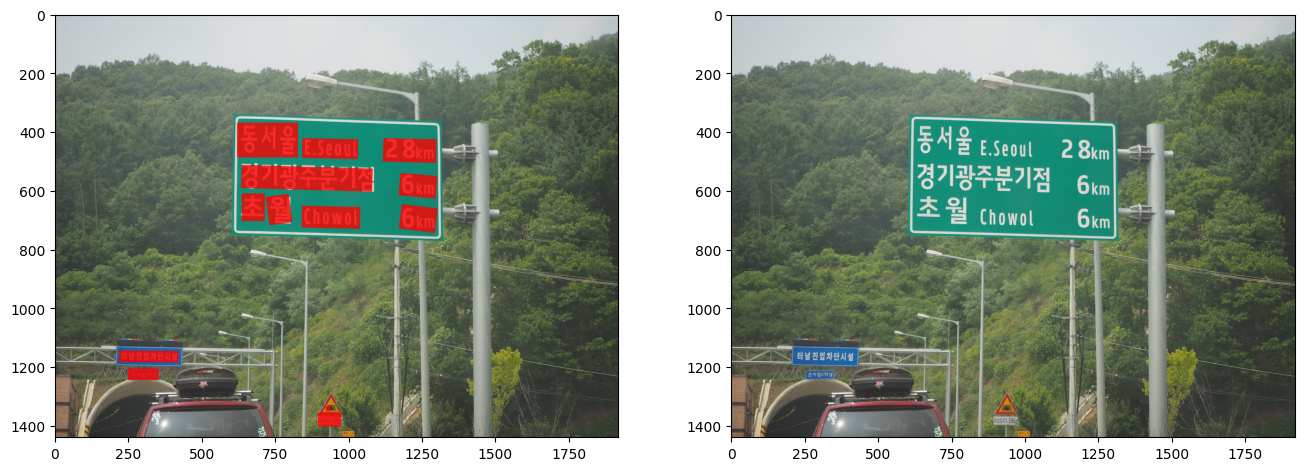

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from mmocr.apis import TextDetInferencer

img = '/content/drive/MyDrive/Colab Notebooks/pj4_desktop/Temp/temp_Sign/000D6985A1C98F0549F53FEE4FA556B8.jpg'
checkpoint = '/content/mmocr/mmocr/work_dirs/test/epoch_10.pth'
cfg_file = '/content/mmocr/configs/textdet/dbnet/dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015.py'

infer = TextDetInferencer(cfg_file, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}' )
ex = [round(x) for x in result["predictions"][0]["polygons"][0]]
print(f'result: {ex}')

fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(result['visualization'][0])
img = cv2.imread(img)
ax[1].imshow(np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.show()

In [ ]:
result['visualization'][0].shape, img.shape

((1440, 1920, 3), (1440, 1920, 3))

In [ ]:
result["predictions"][0].keys()

dict_keys(['polygons', 'scores'])